In [38]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('penguins.csv')

# Просмотр первых строк датасета
print('ПЕРВЫЕ СТРОКИ ДАТАСЕТА:')
print(df.head())

print('\nСТОЛБЦЫ:')
print('- culmen_length_mm: длина клюва, мм')
print('- culmen_depth_mm: толщина клюва, мм')
print('- flipper_length_mm: длина крыла (плавника), мм')
print('- body_mass_g: вес, г')
print('- sex: пол пингвина')

# Информация о данных
print('\nИНФОРМАЦИЯ О ДАННЫХ:')
print(df.info())

# Количество строк и столбцов
print('\nКОЛИЧЕСТВО СТРОК И СТОЛБЦОВ:', df.shape)

# Проверяем наличие пропущенных значений и наличие дубликатов
print('\nНАЛИЧИЕ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:')
print(df.isnull().sum())
print('\nНАЛИЧИЕ ДУБЛИКАТОВ:', df.duplicated().sum())

# Базовая статистика
print('\nБАЗОВАЯ СТАТИСТИКА:')
print(df.describe())

ПЕРВЫЕ СТРОКИ ДАТАСЕТА:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

СТОЛБЦЫ:
- culmen_length_mm: длина клюва, мм
- culmen_depth_mm: толщина клюва, мм
- flipper_length_mm: длина крыла (плавника), мм
- body_mass_g: вес, г
- sex: пол пингвина

ИНФОРМАЦИЯ О ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm 

In [39]:
# Предварительная обработка данных

print('\nКОЛИЧЕСТВО СТРОК И СТОЛБЦОВ ДО ОБРАБОТКИ:', df.shape)

# 1. Удаление строк, где все столбцы NaN
df_clean = df.dropna(how='all')
print(f"Размер после удаления строк с NaN во всех столбцах: {df_clean.shape}")

# 2. Заполнение пропусков в категориальных столбцах модой
# Определение числовых и категориальных столбцов
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['sex']

for col in categorical_cols:
    if df_clean[col].isnull().any():
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"Заполнено NaN в {col} модой: {mode_value}")

# 3. Удаление дубликатов
df_clean = df_clean.drop_duplicates()

# 4. Удаление строк, в которых "flipper_length" отрицательный
df_clean.drop(df_clean[df_clean['flipper_length_mm'] < 0].index, inplace=True)

print('\nКОЛИЧЕСТВО СТРОК И СТОЛБЦОВ ПОСЛЕ ОБРАБОТКИ:', df_clean.shape)
print('\nИНФОРМАЦИЯ О ДАННЫХ ПОСЛЕ ОБРАБОТКИ:')
print(df_clean.info())



КОЛИЧЕСТВО СТРОК И СТОЛБЦОВ ДО ОБРАБОТКИ: (344, 5)
Размер после удаления строк с NaN во всех столбцах: (342, 5)
Заполнено NaN в sex модой: MALE

КОЛИЧЕСТВО СТРОК И СТОЛБЦОВ ПОСЛЕ ОБРАБОТКИ: (341, 5)

ИНФОРМАЦИЯ О ДАННЫХ ПОСЛЕ ОБРАБОТКИ:
<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   341 non-null    float64
 1   culmen_depth_mm    341 non-null    float64
 2   flipper_length_mm  341 non-null    float64
 3   body_mass_g        341 non-null    float64
 4   sex                341 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB
None


/tmp/ipython-input-1005004599.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-1005004599.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(mode_value, inplace=True)


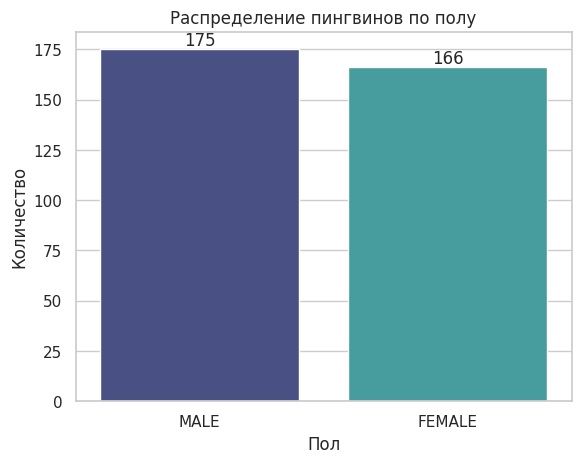

In [40]:
# Визуальный анализ данных
# Гистограмма "Распределение пингвинов по полу"

chart = sns.countplot(data=df_clean, x='sex', hue='sex', palette='mako', legend=False)
for container in chart.containers:
  chart.bar_label(container)
plt.title('Распределение пингвинов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

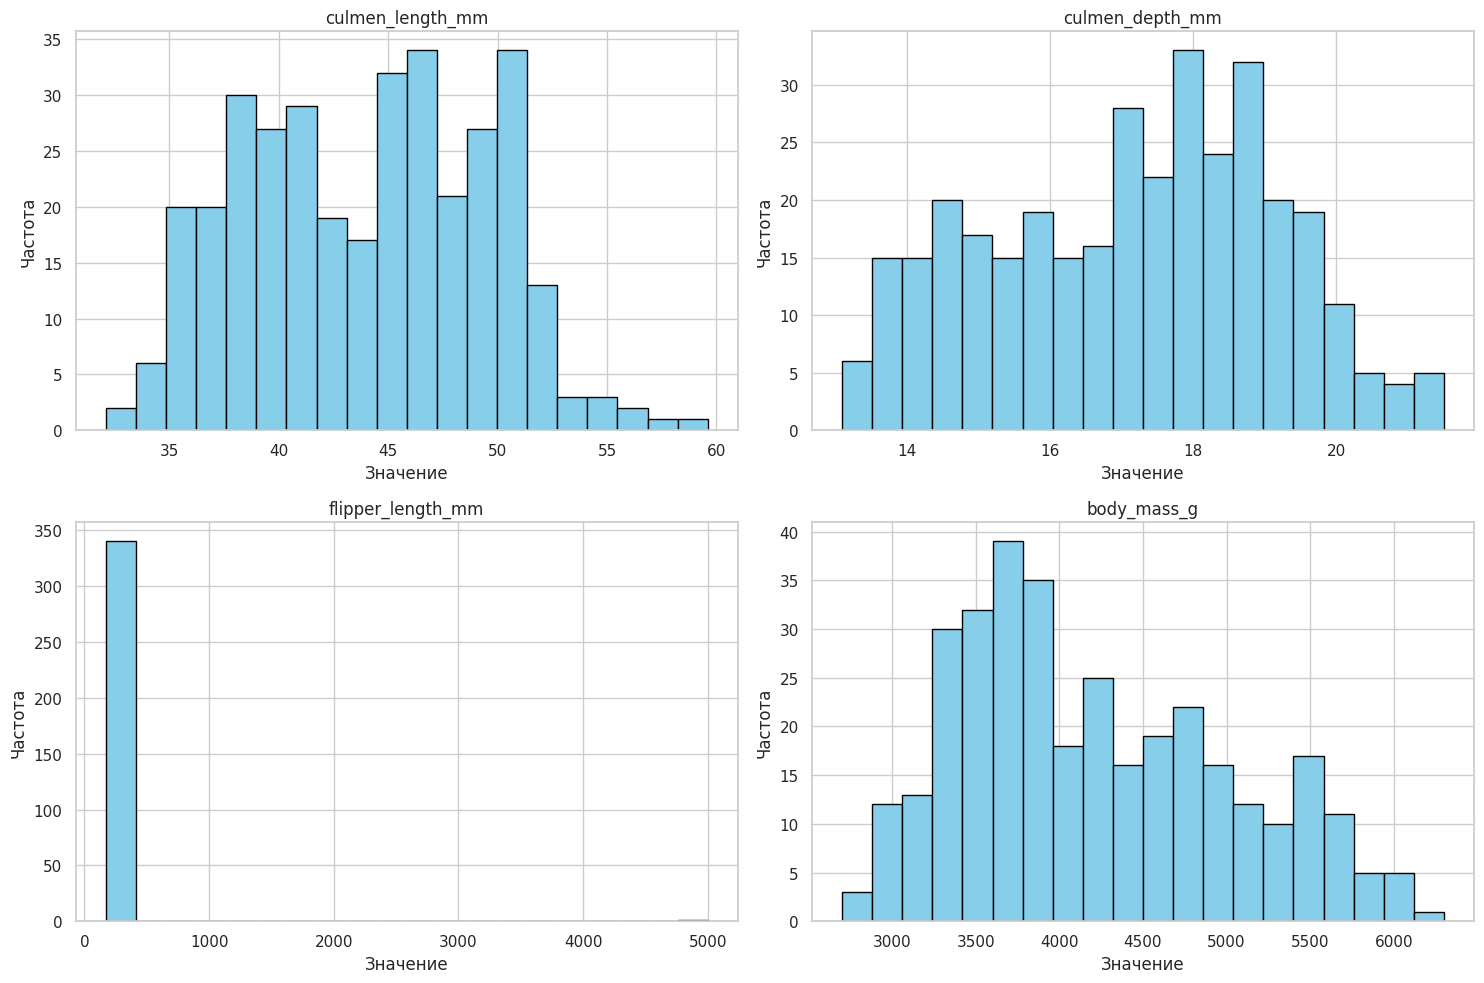

In [41]:
# Создание гистограмм для каждой числовой переменной
# Установка стиля Seaborn
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df_clean.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('', ''))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

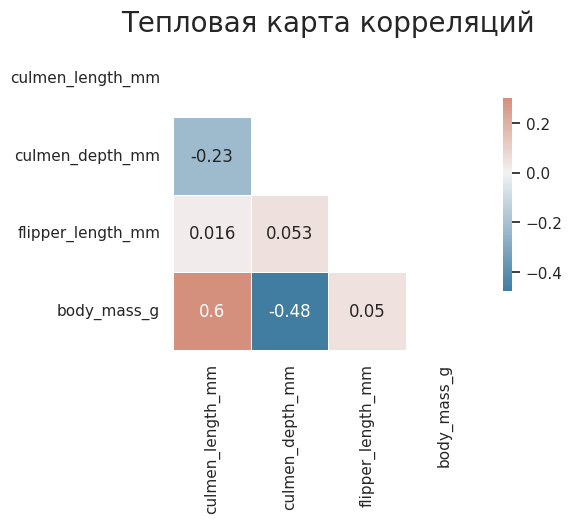

In [42]:
# Тепловая карта корреляций

# Установка стиля Seaborn
sns.set(style="white")

# Расчет корреляционной матрицы только для числовых данных
numeric_df = df_clean.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
corr = numeric_df.corr()

# Маска для отображения только нижней треугольной части матрицы (опционально)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Настройка цветовой палитры
cmap = sns.diverging_palette(235, 20, as_cmap=True)

# Создание тепловой карты
plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Добавление заголовка
plt.title('Тепловая карта корреляций', fontsize=20)

# Показать график
plt.show()

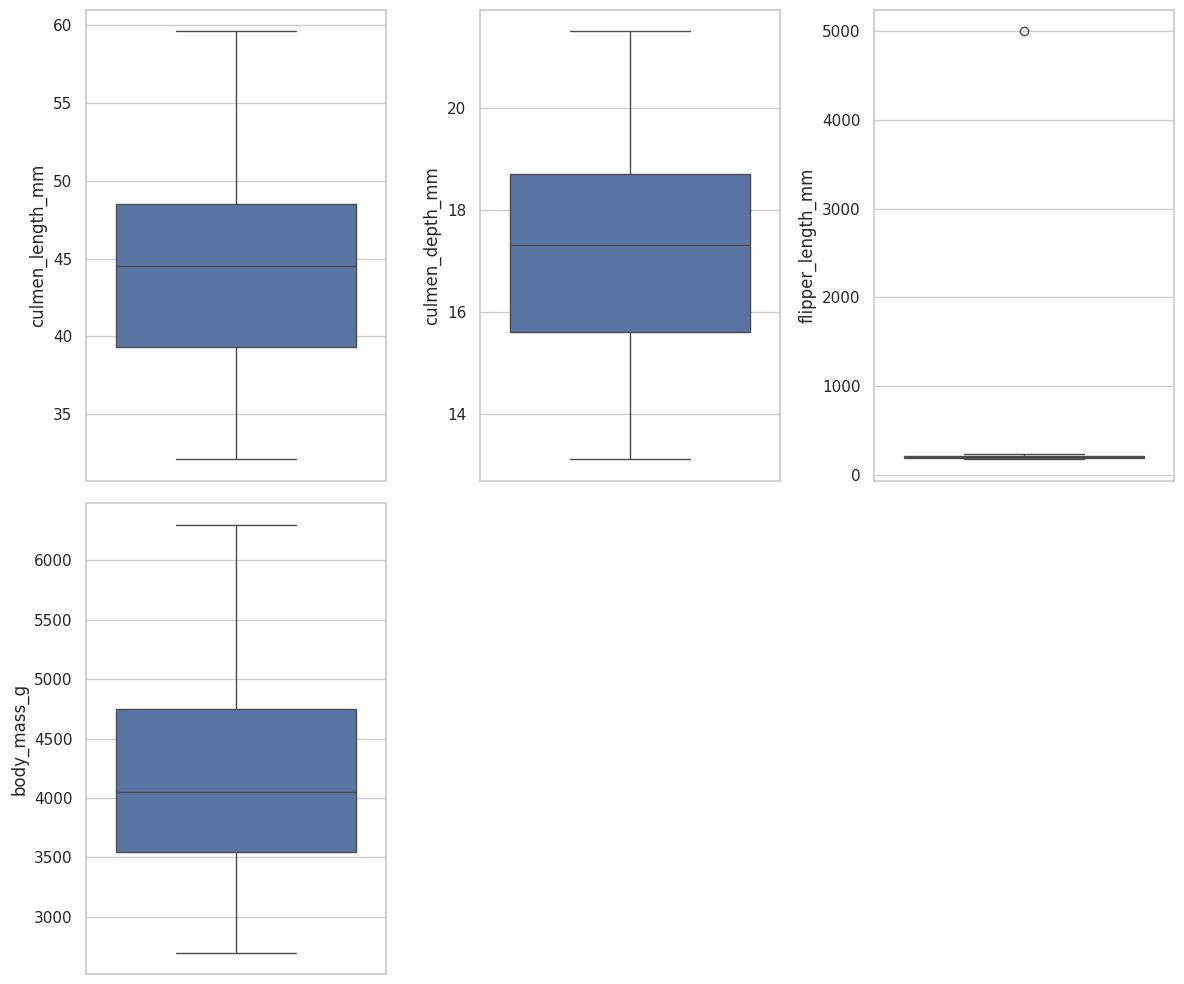

In [43]:
# Ящики с усами

# Установка стиля Seaborn
sns.set(style="whitegrid")

# Создаем ящики с усами для каждой колонки в DataFrame
plt.figure(figsize=(12, 10))

# Перебираем каждый числовой столбец и создаем для него ящик с усами
for index, column in enumerate(df_clean.select_dtypes(include=[np.number]).columns):
    plt.subplot((len(df_clean.columns) // 3) + 1, 3, index + 1)
    sns.boxplot(y=df_clean[column])

plt.tight_layout()
plt.show()

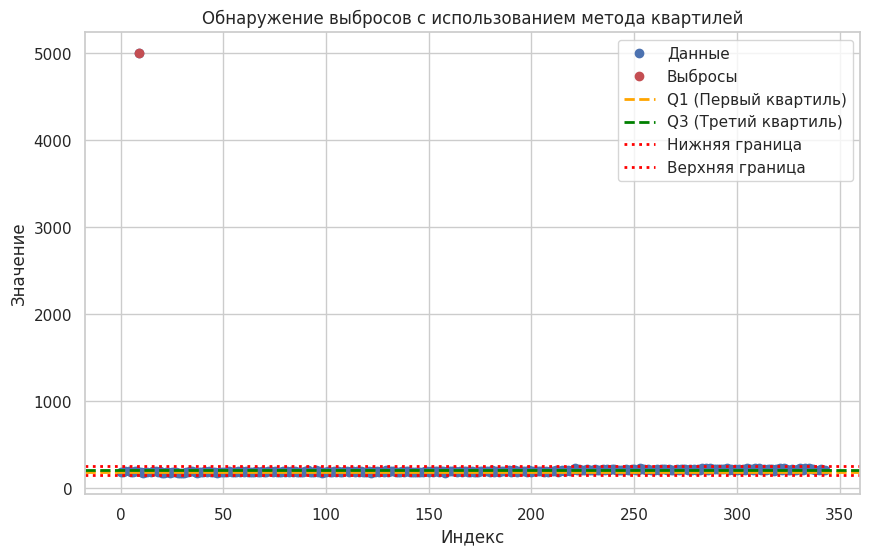

Найденные выбросы (индексы и значения):
Индекс 9: 5000.0


In [44]:
# Выявление выбросов методом квартилей

# Вычисление квартилей и межквартильного размаха
Q1 = np.percentile(df_clean['flipper_length_mm'], 25)
Q3 = np.percentile(df_clean['flipper_length_mm'], 75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов (np.where возвращает кортеж; берем [0] для индексов позиций)
outliers_indices = np.where((df_clean['flipper_length_mm'] < lower_bound) | (df_clean['flipper_length_mm'] > upper_bound))[0]

# Визуализация данных и выбросов
plt.figure(figsize=(10, 6))
# Используем df.index для x-оси, чтобы соответствовать индексам DataFrame
plt.plot(df_clean.index, df_clean['flipper_length_mm'], 'bo', label='Данные')
# Для выбросов: x - соответствующие индексы df, y - значения
plt.plot(df_clean.index[outliers_indices], df_clean['flipper_length_mm'].iloc[outliers_indices], 'ro', label='Выбросы')
plt.axhline(Q1, color='orange', linestyle='dashed', linewidth=2, label='Q1 (Первый квартиль)')
plt.axhline(Q3, color='green', linestyle='dashed', linewidth=2, label='Q3 (Третий квартиль)')
plt.axhline(lower_bound, color='red', linestyle='dotted', linewidth=2, label='Нижняя граница')
plt.axhline(upper_bound, color='red', linestyle='dotted', linewidth=2, label='Верхняя граница')

plt.title('Обнаружение выбросов с использованием метода квартилей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Вывод найденных выбросов
if len(outliers_indices) > 0:
    print("Найденные выбросы (индексы и значения):")
    for idx in outliers_indices:
        print(f"Индекс {df_clean.index[idx]}: {df_clean['flipper_length_mm'].iloc[idx]}")
else:
    print("Выбросы не найдены.")

In [45]:
# Удаление строк
print('\nКоличество строк и столбцов:', df_clean.shape)
df_clean.drop(df_clean[df['flipper_length_mm'] >= 5000].index, inplace=True)
print('\nКоличество строк и столбцов:', df_clean.shape)


Количество строк и столбцов: (341, 5)

Количество строк и столбцов: (340, 5)


/tmp/ipython-input-872742927.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean.drop(df_clean[df['flipper_length_mm'] >= 5000].index, inplace=True)


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Преобразование категориальных данных
encoder = LabelEncoder()
df_clean['sex'] = encoder.fit_transform(df_clean['sex'])

# Стандартизация данных
scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_clean)

print(df_clean_scaled)

[[-0.89195731  0.80113199 -1.41843103 -0.56164097  0.976741  ]
 [-0.81846958  0.13752566 -1.06303932 -0.49937885 -1.02381286]
 [-0.67149412  0.4438055  -0.42333424 -1.1842622  -1.02381286]
 ...
 [ 1.18407103 -0.73026724  1.49578099  1.92884395  0.976741  ]
 [ 0.22873056 -1.18968701  0.78499757  1.24396059 -1.02381286]
 [ 1.09221137 -0.52608068  0.85607591  1.49300908  0.976741  ]]


Обнаружено аномалий: 17 из 340
Процент аномалий: 5.00%

Confusion Matrix:
[[323  17]
 [  0   0]]


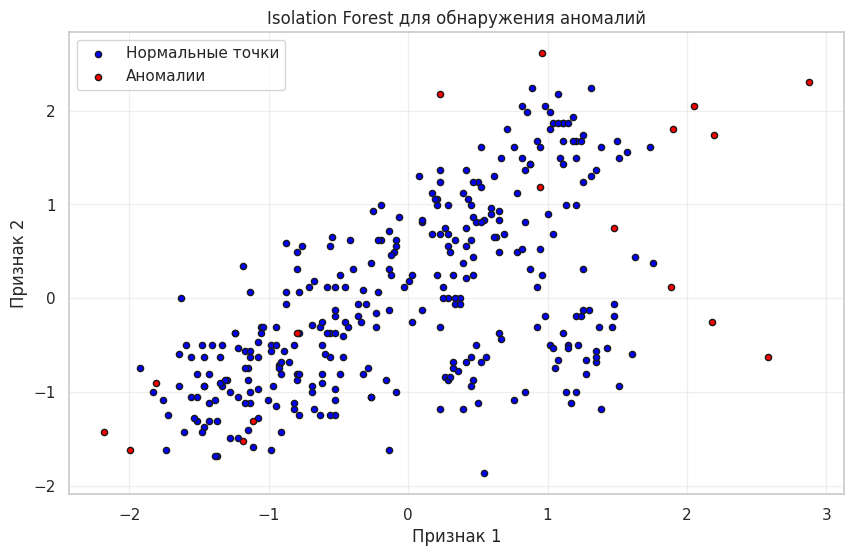

In [49]:
# IsolationForest для обнаружения аномалий

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest

# Используем все данные для обнаружения аномалий
X = df_clean_scaled

# Построение модели Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)  # 5% аномалий
clf.fit(X)
y_pred = clf.predict(X)  # y_pred: 1=нормальные, -1=аномалии

# Вывод статистики
num_anomalies = np.sum(y_pred == -1)
print(f"Обнаружено аномалий: {num_anomalies} из {len(y_pred)}")
print(f"Процент аномалий: {num_anomalies / len(y_pred) * 100:.2f}%")

y_true = (df_clean['sex'] == 'Male').astype(int).values  # 0=норма, 1=аномалия

# Преобразование y_pred в бинарный формат для метрик (1=аномалия, 0=норма)
y_pred_binary = np.where(y_pred == -1, 1, 0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Визуализация
plt.figure(figsize=(10, 6))
plt.title("Isolation Forest для обнаружения аномалий")

# Отображение нормальных точек
normal_points = X[y_pred == 1]
plt.scatter(normal_points[:, 0], normal_points[:, 3], c='blue', s=20, edgecolor='k', label="Нормальные точки")

# Отображение аномалий
anomalies = X[y_pred == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 3], c='red', s=20, edgecolor='k', label="Аномалии")

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

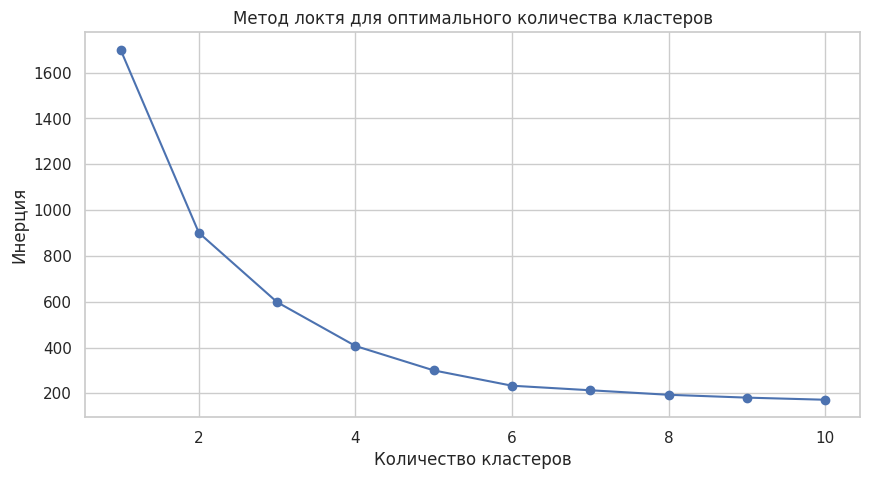

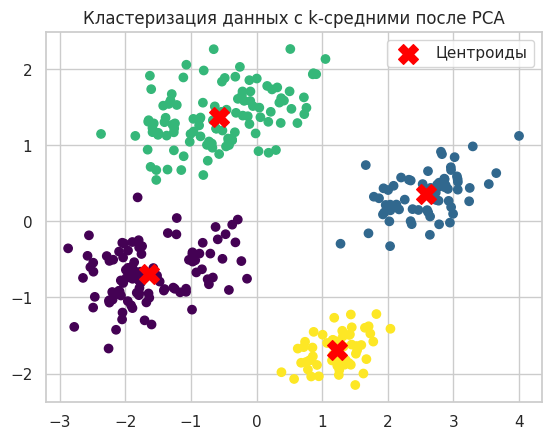

Силуэтовская оценка: 0.50
Индекс Дэвиса-Болдуина: 0.78
Индекс Калински-Харабаса: 355.82


In [50]:
# 1. Кластеризация по методу К-средних (K-Means)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Метод локтя (Elbow Method) для выбора оптимального количества кластеров
inertia_scores = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clean_scaled)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для оптимального количества кластеров')
plt.grid(True)
plt.show()

# Выбор количества кластеров (k) на основе метода локтя
k = 4

# Кластеризация с использованием k-средних
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_clean_scaled)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
df_clean_scaled_pca = pca.fit_transform(df_clean_scaled)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(df_clean_scaled_pca[:, 0], df_clean_scaled_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(df_clean_scaled, labels)
davies_bouldin = davies_bouldin_score(df_clean_scaled, labels)
calinski_harabasz = calinski_harabasz_score(df_clean_scaled, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

Number of clusters: 2, Silhouette Score: 0.44, Davies-Bouldin Index: 0.97, Inertia: 900.88, Calinski-Harabasz Index: 299.82


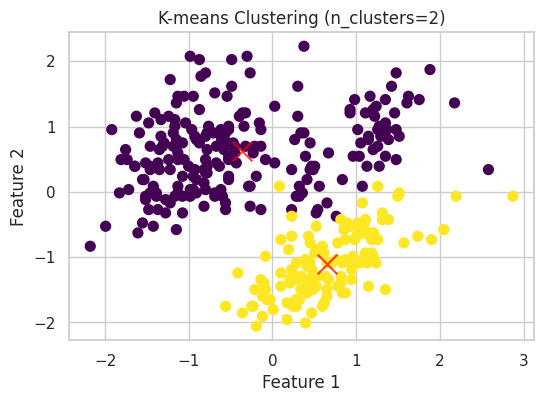

Number of clusters: 3, Silhouette Score: 0.45, Davies-Bouldin Index: 0.93, Inertia: 598.12, Calinski-Harabasz Index: 310.42


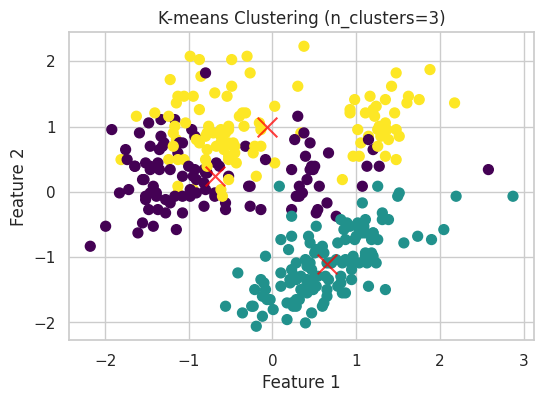

Number of clusters: 4, Silhouette Score: 0.50, Davies-Bouldin Index: 0.78, Inertia: 407.00, Calinski-Harabasz Index: 355.82


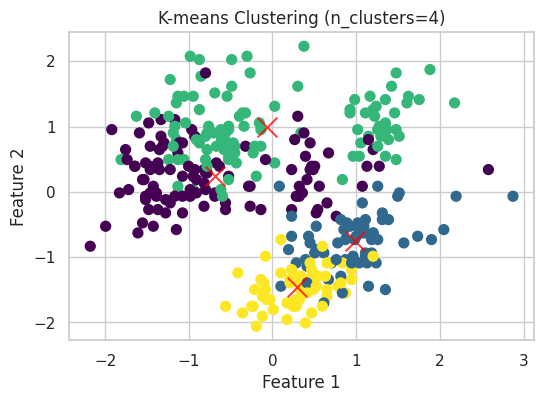

Number of clusters: 5, Silhouette Score: 0.44, Davies-Bouldin Index: 0.96, Inertia: 387.35, Calinski-Harabasz Index: 283.81


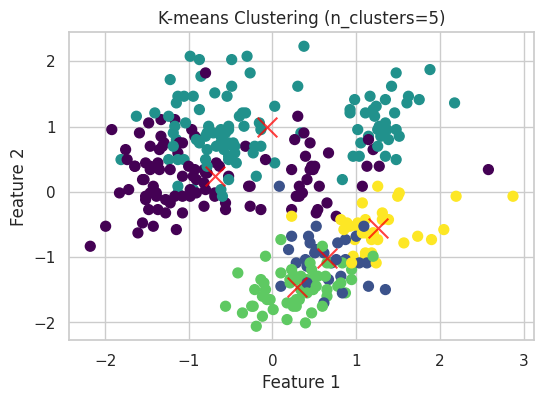

Number of clusters: 6, Silhouette Score: 0.46, Davies-Bouldin Index: 0.90, Inertia: 280.88, Calinski-Harabasz Index: 337.50


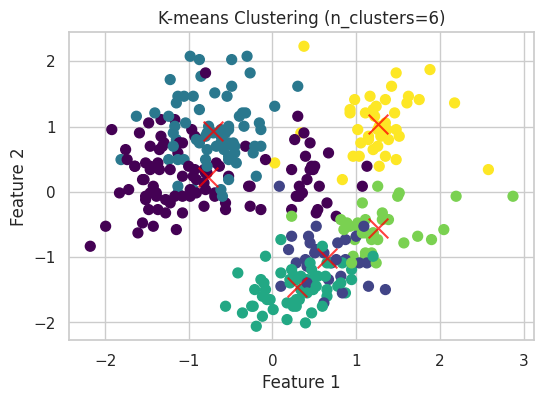

Number of clusters: 7, Silhouette Score: 0.40, Davies-Bouldin Index: 1.06, Inertia: 260.59, Calinski-Harabasz Index: 306.57


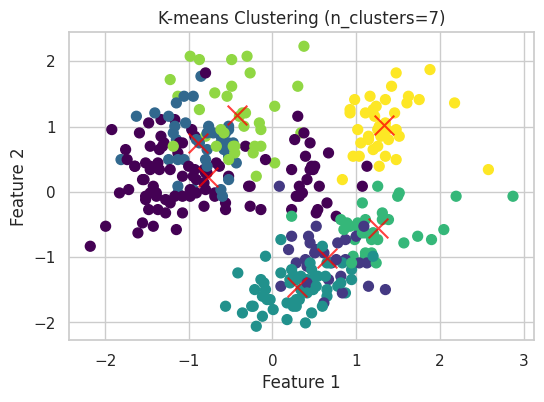

Number of clusters: 8, Silhouette Score: 0.40, Davies-Bouldin Index: 1.04, Inertia: 206.20, Calinski-Harabasz Index: 343.59


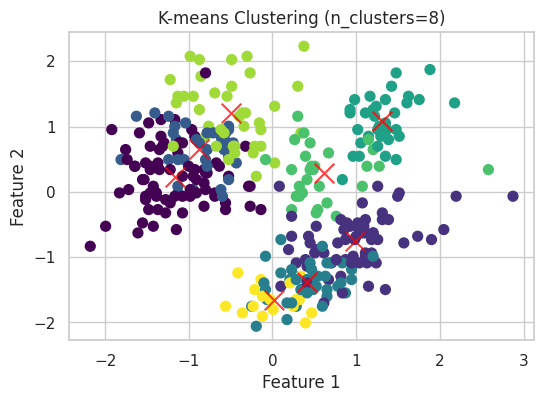

Number of clusters: 9, Silhouette Score: 0.40, Davies-Bouldin Index: 1.05, Inertia: 195.98, Calinski-Harabasz Index: 317.53


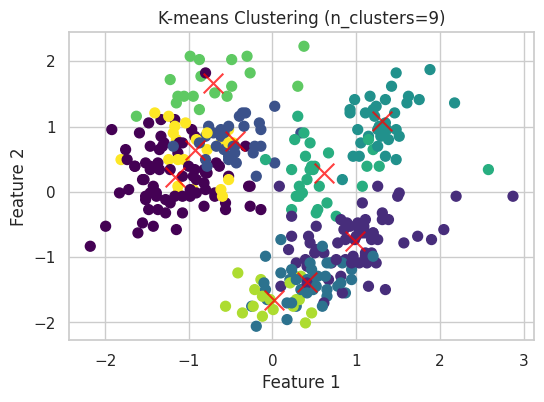

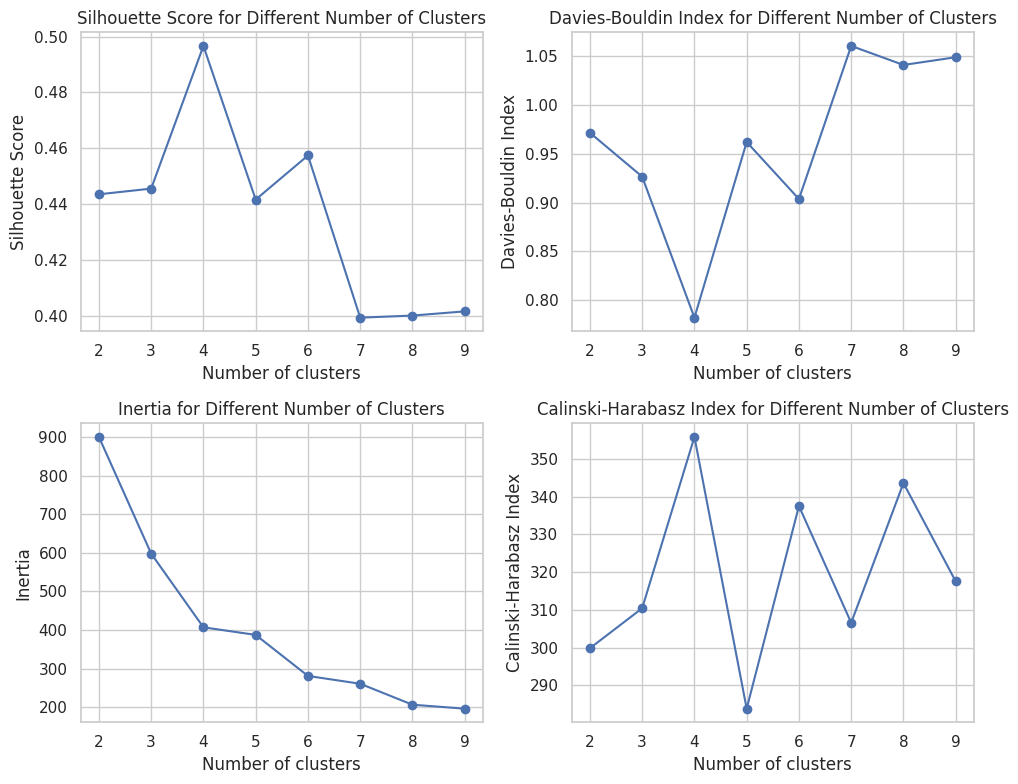

In [51]:
# Внутренние метрики оценки качества кластеризации
# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_clean_scaled)

    # Оценка метрик
    silhouette_avg = silhouette_score(df_clean_scaled, labels)
    davies_bouldin = davies_bouldin_score(df_clean_scaled, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(df_clean_scaled, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}, Inertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz:.2f}")

    # Визуализация кластеров
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean_scaled[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

    # Отображение центров кластеров
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

    plt.title(f"K-means Clustering (n_clusters={n_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Визуализация изменения метрик
plt.figure(figsize=(10, 8))

# Silhouette Score (Индекс Силуэт)
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')

# Davies-Bouldin Index (Индекс Дэвиса-Болдуина)
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Clusters')

# Inertia (Сумма внутрикластерных расстояний)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Number of Clusters')

# Calinski-Harabasz Index (Коэффициент Кэллински-Харабаза)
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Number of Clusters')

plt.tight_layout()
plt.show()

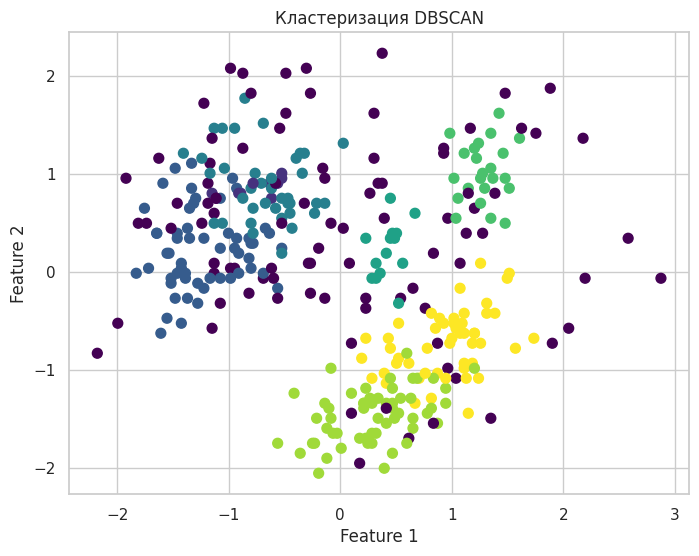

Силуэтовская оценка: 0.53
Индекс Дэвиса-Болдуина: 0.76
Индекс Калински-Харабаса: 432.12


In [52]:
# 2. Пространственная кластеризация на основе плотности (DBSCAN).

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels = dbscan.fit_predict(df_clean_scaled)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(df_clean_scaled[:, 0], df_clean_scaled[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.title("Кластеризация DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Вычисление метрик качества (игнорируем метку -1 для шума)
mask = predicted_labels != -1
if np.sum(mask) > 1:
 silhouette_avg = silhouette_score(df_clean_scaled[mask], predicted_labels[mask])
 davies_bouldin = davies_bouldin_score(df_clean_scaled[mask], predicted_labels[mask])
 calinski_harabasz = calinski_harabasz_score(df_clean_scaled[mask], predicted_labels[mask])

 print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
 print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
 print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

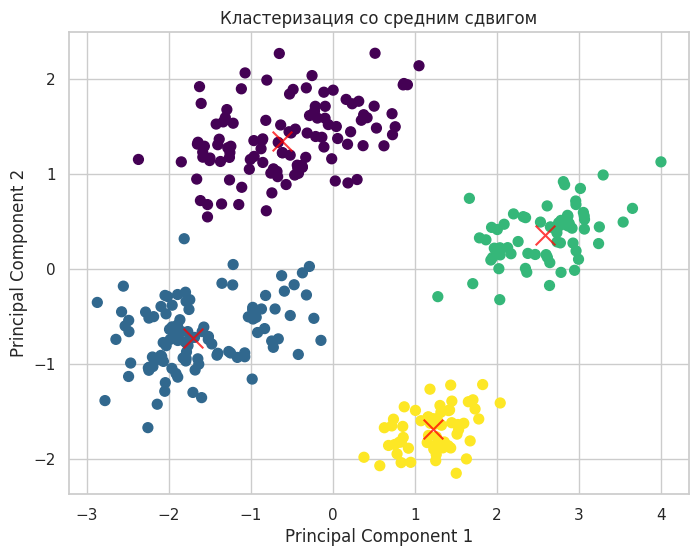

Силуэтовская оценка: 0.50
Индекс Дэвиса-Болдуина: 0.78
Индекс Калински-Харабаса: 355.82


In [53]:
# 3. Кластеризация со средним сдвигом (Mean Shift)

# Оценка ширины полосы пропускания (bandwidth) для алгоритма MeanShift
bandwidth = estimate_bandwidth(df_clean_scaled, quantile=0.2, n_samples=None)

# Кластеризация с использованием алгоритма со средним сдвигом
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(df_clean_scaled)
predicted_labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
df_clean_scaled_pca = pca.fit_transform(df_clean_scaled)

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(df_clean_scaled_pca[:, 0], df_clean_scaled_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Кластеризация со средним сдвигом")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(df_clean_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(df_clean_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(df_clean_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

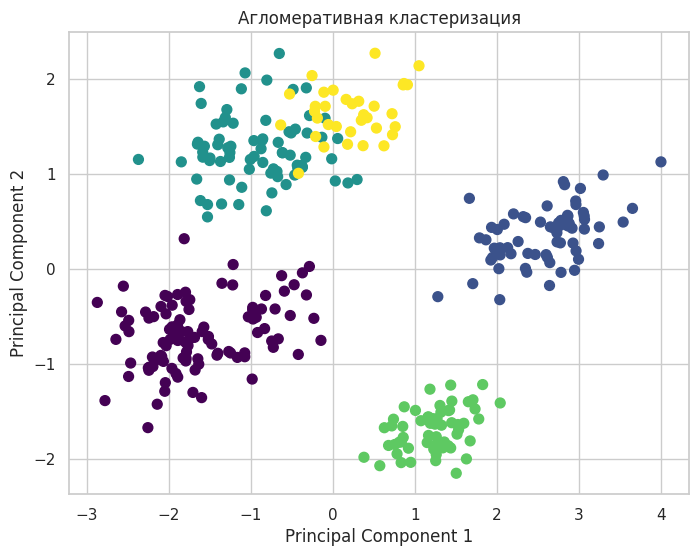

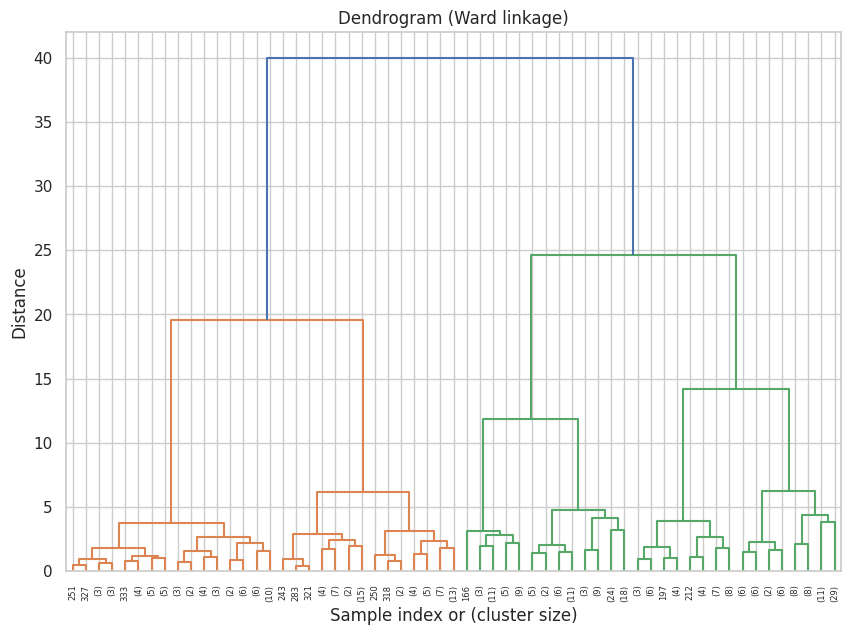

Силуэтовская оценка: 0.51
Индекс Дэвиса-Болдуина: 0.73
Индекс Калински-Харабаса: 381.44


In [54]:
# 4. Агломеративная кластеризация

# Применение агломеративной кластеризации
n_clusters = 5  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
predicted_labels = agg_clustering.fit_predict(df_clean_scaled)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_clean_scaled)

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(df_clean_scaled_pca[:, 0], df_clean_scaled_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Агломеративная кластеризация")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
Z = linkage(df_clean_scaled, method='ward') # метод Уорда
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(df_clean_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(df_clean_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(df_clean_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

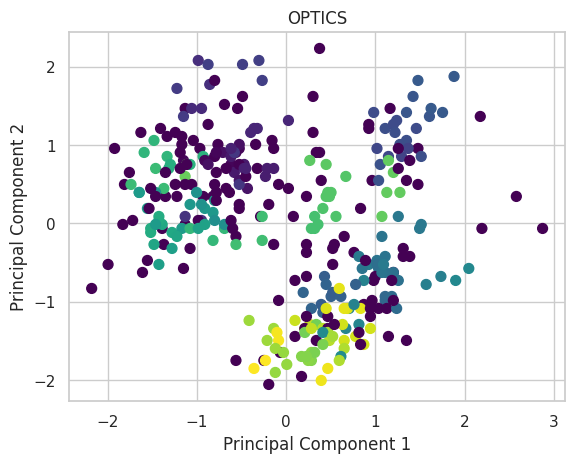

Силуэтовская оценка: -0.08
Индекс Дэвиса-Болдуина: 1.15
Индекс Калински-Харабаса: 5.29


In [55]:
# 5. Кластеризация на основе OPTICS

# Кластеризация с использованием OPTICS
optics = OPTICS(min_samples=2)
predicted_labels = optics.fit_predict(df_clean_scaled)

# Визуализация кластеров (в этом случае, используем только первые два признака для визуализации)
plt.scatter(df_clean_scaled[:, 0], df_clean_scaled[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.title('OPTICS')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(df_clean_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(df_clean_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(df_clean_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

In [ ]:
# Сравним метрики:

# 1. Кластеризация по методу К-средних (K-Means)
#Силуэтовская оценка: 0.50
#Индекс Дэвиса-Болдуина: 0.78
#Индекс Калински-Харабаса: 355.82

# 2. Пространственная кластеризация на основе плотности (DBSCAN).
#Силуэтовская оценка: 0.53
#Индекс Дэвиса-Болдуина: 0.76
#Индекс Калински-Харабаса: 432.12

# 3. Кластеризация со средним сдвигом (Mean Shift)
#Силуэтовская оценка: 0.50
#Индекс Дэвиса-Болдуина: 0.78
#Индекс Калински-Харабаса: 355.82

# 4. Агломеративная кластеризация
#Силуэтовская оценка: 0.51
#Индекс Дэвиса-Болдуина: 0.73
#Индекс Калински-Харабаса: 381.44

# 5. Кластеризация на основе OPTICS
#Силуэтовская оценка: -0.08
#Индекс Дэвиса-Болдуина: 1.15
#Индекс Калински-Харабаса: 5.29
